Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

Load Dataset and Initial Cleaning

In [26]:
# Load data
df = pd.read_csv("climate_change_indicators.csv")

# Initial cleaning
year_cols = [col for col in df.columns if col.startswith('F')]
columns_to_keep = ['Country', 'ISO2', 'ISO3'] + year_cols
df = df[columns_to_keep]

# Fill missing values by interpolation and forward/backward fill
df[year_cols] = df[year_cols].interpolate(axis=1).ffill(axis=1).bfill(axis=1)

In [15]:
df.head()

,Country,ISO2,ISO3,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",AF,AFG,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,AL,ALB,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,DZ,DZA,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,AS,ASM,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",AD,AND,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [29]:
df.describe()

,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,0.912071,1.088342,1.237102,1.393623,1.244051,1.264600,1.398633,1.503330,1.305880,1.342404
std,0.347654,0.579623,0.493476,0.453479,0.433643,0.615399,0.509107,0.652794,0.516345,0.686329
min,-0.434000,-0.434000,-0.434000,-0.434000,-0.434000,-0.434000,-0.434000,-0.434000,-0.434000,-1.305000
25%,0.715000,0.714000,0.983000,1.118000,0.978000,0.848000,1.118000,1.134000,0.982000,0.868000
50%,0.894000,0.976000,1.212000,1.411000,1.257000,1.110000,1.396000,1.434000,1.300000,1.281000
75%,1.186000,1.306000,1.516000,1.692000,1.512000,1.609000,1.675000,1.778000,1.596000,1.865000
max,1.643000,2.704000,2.613000,2.459000,2.493000,2.772000,2.689000,3.691000,2.676000,3.243000


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  225 non-null    object 
 1   ISO2     223 non-null    object 
 2   ISO3     225 non-null    object 
 3   F2013    225 non-null    float64
 4   F2014    225 non-null    float64
 5   F2015    225 non-null    float64
 6   F2016    225 non-null    float64
 7   F2017    225 non-null    float64
 8   F2018    225 non-null    float64
 9   F2019    225 non-null    float64
 10  F2020    225 non-null    float64
 11  F2021    225 non-null    float64
 12  F2022    225 non-null    float64
dtypes: float64(10), object(3)
memory usage: 23.0+ KB


In [31]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Check for duplicates
duplicate_rows = df.duplicated().sum()

print("Missing Values: ", missing_values, "\nDuplicate Rows: ", duplicate_rows)

Missing Values:  Country    0
ISO2       2
ISO3       0
F2013      0
F2014      0
F2015      0
F2016      0
F2017      0
F2018      0
F2019      0
F2020      0
F2021      0
F2022      0
dtype: int64 
Duplicate Rows:  0


In [27]:
# Keep only last 10 years (2013-2022)
last_10_years = [f"F{year}" for year in range(2013, 2023)]
df = df[['Country', 'ISO2', 'ISO3'] + last_10_years]

# Reshape to long format
long_df = df.melt(id_vars=['Country', 'ISO2', 'ISO3'], value_vars=last_10_years,
                  var_name='Year', value_name='TempChange')
long_df['Year'] = long_df['Year'].str.replace('F', '').astype(int)

Filter Data for Last 10 Years (2013-2022) and Reshape

Create Binary Target Based on Average Temperature Change
   

Calculate average temperature change per country.

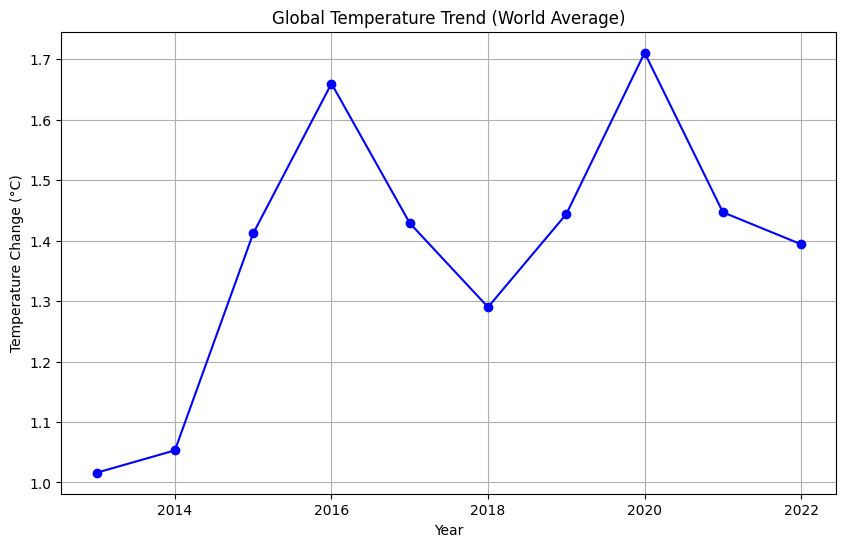

In [33]:
# Filter data "
world_data = df[df['Country'] == 'World']

# Extract years and corresponding temperature values
# Use the correct variable name 'last_10_years' instead of 'year_columns'
years = [int(col[1:]) for col in last_10_years]
world_temperatures = world_data[last_10_years].values.flatten()

# Plotting the global temperature trend
plt.figure(figsize=(10, 6))
plt.plot(years, world_temperatures, marker='o', linestyle='-', color='b')
plt.title('Global Temperature Trend (World Average)')
plt.xlabel('Year')
plt.ylabel('Temperature Change (°C)')
plt.grid(True)
plt.show()

# Exploratory Data Analysis (EDA)

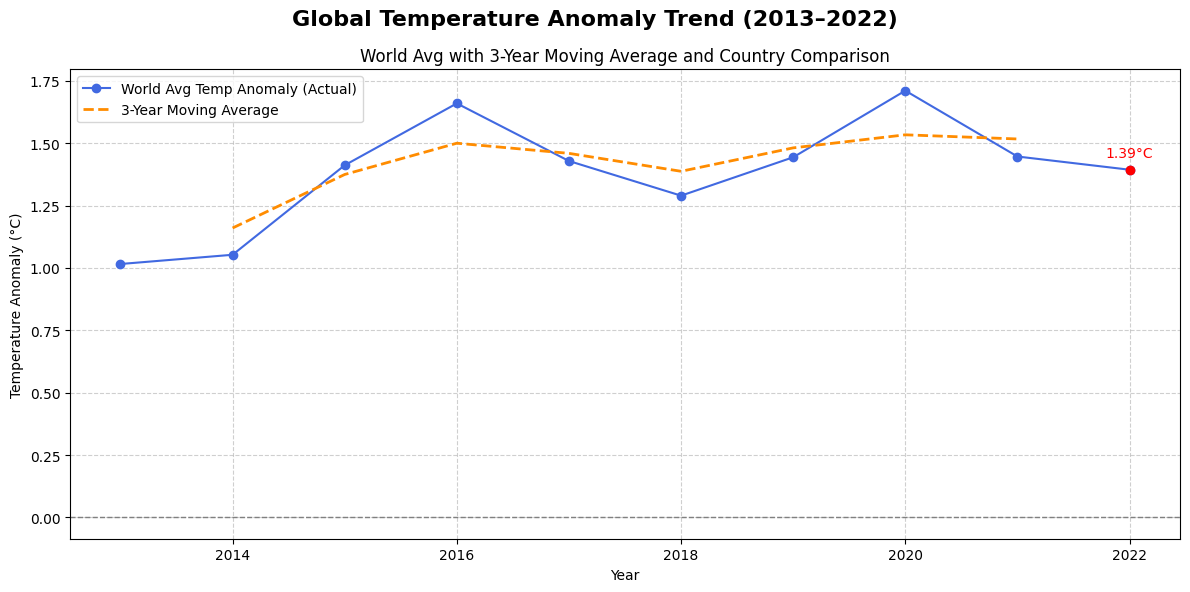

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (if not already loaded)
df = pd.read_csv('climate_change_indicators.csv')  # Adjust path if needed

# Focused time period: 2013–2022
selected_years = [f'F{year}' for year in range(2013, 2023)]
years = [int(col[1:]) for col in selected_years]

# Get the 'World' row
world_data = df[df['Country'] == 'World']

# Extract temperature anomalies
temperatures = world_data[selected_years].values.flatten()

# Calculate a 3-year moving average
moving_avg = pd.Series(temperatures).rolling(window=3, center=True).mean()

# Plotting
plt.figure(figsize=(12, 6))

# Actual data line
plt.plot(years, temperatures, marker='o', color='royalblue', label='World Avg Temp Anomaly (Actual)')

# Moving average line
plt.plot(years, moving_avg, linestyle='--', color='darkorange', linewidth=2, label='3-Year Moving Average')

# Highlight last data point
plt.scatter(years[-1], temperatures[-1], color='red', zorder=5)
plt.text(years[-1], temperatures[-1] + 0.05, f"{temperatures[-1]:.2f}°C", ha='center', color='red', fontsize=10)

# Baseline at 0°C
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Titles and labels
plt.suptitle('Global Temperature Anomaly Trend (2013–2022)', fontsize=16, fontweight='bold')
plt.title('World Avg with 3-Year Moving Average and Country Comparison', fontsize=12)

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')
plt.tight_layout()

# Save high-res plot
plt.savefig("global_temp_trend_2013_2022.png", dpi=300)

# Show plot
plt.show()


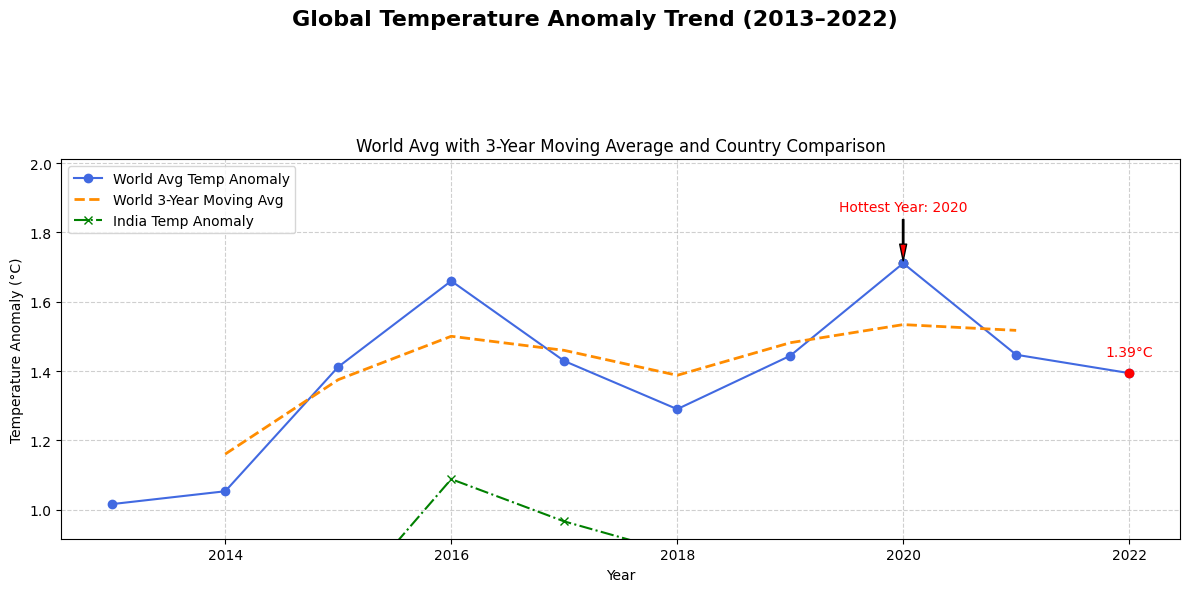

In [45]:
plt.figure(figsize=(12, 6))

# Plotting lines
plt.plot(years, world_temps, marker='o', color='royalblue', label='World Avg Temp Anomaly')
plt.plot(years, world_ma, linestyle='--', color='darkorange', linewidth=2, label='World 3-Year Moving Avg')

if other_temps is not None:
    plt.plot(years, other_temps, linestyle='-.', color='green', marker='x', label=f'{country_to_compare} Temp Anomaly')

# Highlight last point of world temps
plt.scatter(years[-1], world_temps[-1], color='red', zorder=5)
plt.text(years[-1], world_temps[-1] + 0.05, f"{world_temps[-1]:.2f}°C", ha='center', color='red', fontsize=10)

# Highlight hottest year point
plt.scatter(max_year, max_temp, color='black')

# Annotate hottest year with arrow, offset text to avoid clipping
plt.annotate(
    f"Hottest Year: {max_year}",
    xy=(max_year, max_temp),
    xytext=(max_year, max_temp + 0.15),
    ha='center',
    fontsize=10,
    color='red',
    arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=5)
)

# Baseline line
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Labels, legend, grid
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')

# Titles with spacing
plt.suptitle('Global Temperature Anomaly Trend (2013–2022)', fontsize=16, fontweight='bold')
plt.title('World Avg with 3-Year Moving Average and Country Comparison', fontsize=12)

# Adjust subplot params to give room for titles
plt.subplots_adjust(top=0.85)

# Optionally adjust y limits so annotations are visible
# Create a list containing world_temps and max_temp (if not already included)
values_to_check_max = list(world_temps)
if max_temp not in world_temps:
    values_to_check_max.append(max_temp)

y_max = max(values_to_check_max) + 0.3
plt.ylim(bottom=min(world_temps) - 0.1, top=y_max)

plt.tight_layout(rect=[0, 0, 1, 0.85])  # leave space for suptitle

# Save and show
plt.savefig("global_temp_trend_2013_2022.png", dpi=300)
plt.savefig("global_temp_trend_2013_2022.pdf")
plt.show()


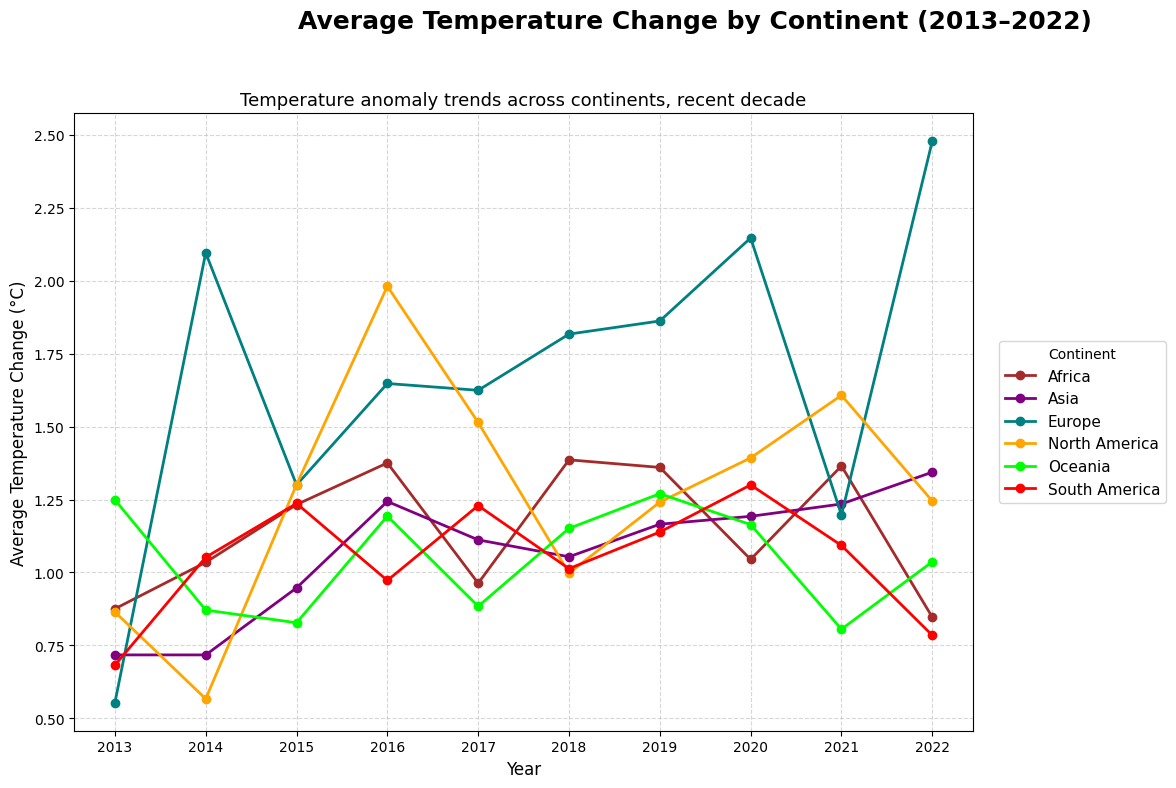

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure pandas is imported if not already in this cell
# import pandas as pd

# Define years to focus on (2013-2022)
focus_years = [year for year in range(2013, 2023)] # Keep as integers for easier comparison/plotting later

# The year columns in the dataframe start with 'F'
year_columns_df = [f'F{year}' for year in focus_years]

# Check if these columns exist in the DataFrame
# If not, you might need to reload or reshape your original data
if not all(col in df.columns for col in year_columns_df):
    print("Warning: Not all specified year columns found in the DataFrame.")
    # You might need to adjust year_columns_df or handle missing columns

# Create a mapping from ISO3 to Continent.
# You'll need a separate dataset or dictionary for this mapping.
# For this example, we'll create a dummy mapping.
# Replace this with your actual continent data source if you have one.
# Example dummy data:
continent_mapping = {
    'USA': 'North America',
    'CAN': 'North America',
    'MEX': 'North America',
    'BRA': 'South America',
    'ARG': 'South America',
    'GBR': 'Europe',
    'FRA': 'Europe',
    'DEU': 'Europe',
    'CHN': 'Asia',
    'IND': 'Asia',
    'JPN': 'Asia',
    'AUS': 'Oceania',
    'NZL': 'Oceania',
    'EGY': 'Africa',
    'NGA': 'Africa',
    'ZAF': 'Africa',
    # Add mappings for all ISO3 codes in your df
    # Or load from a separate file/API
}

# Create the 'Continent' column in the DataFrame based on ISO3
# We'll create a copy to avoid SettingWithCopyWarning
df_with_continent = df.copy()
df_with_continent['Continent'] = df_with_continent['ISO3'].map(continent_mapping)

# Remove rows where Continent is not mapped (optional, but good practice)
df_with_continent.dropna(subset=['Continent'], inplace=True)

# Filter dataset for those years and countries with continent information
# Use the corrected year column names
continent_data = df_with_continent[['Country', 'Continent'] + year_columns_df]


# Calculate average temperature change by continent
# Use the corrected year column names for aggregation
continent_avg_temp = continent_data.groupby('Continent')[year_columns_df].mean()

# Convert year strings (like 'F2013') to integers for plotting on x-axis
# Extract the year part from the column names
years = [int(col[1:]) for col in year_columns_df]


plt.figure(figsize=(14, 8))

# Define a color map for continents (example)
# Ensure you have colors for all continents present in your data
color_map_cont = {
    'Africa': 'brown',
    'Asia': 'purple',
    'Europe': 'teal',
    'North America': 'orange',
    'Oceania': 'lime',
    'South America': 'red',
    'World': 'blue' # Include 'World' if you want to plot it
}


for continent in continent_avg_temp.index:
    # Ensure the number of data points matches the number of years
    if len(years) == len(continent_avg_temp.loc[continent]):
         plt.plot(
             years,
             continent_avg_temp.loc[continent],
             marker='o',
             linestyle='-',
             color=color_map_cont.get(continent, 'gray'), # Use gray for unmapped
             label=continent,
             linewidth=2,
             markersize=6
         )
    else:
        print(f"Warning: Data length mismatch for {continent}. Skipping plot.")


# Main title and subtitle with spacing
plt.suptitle('Average Temperature Change by Continent (2013–2022)', fontsize=18, fontweight='bold')
plt.title('Temperature anomaly trends across continents, recent decade', fontsize=13)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature Change (°C)', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
# Adjust legend position as bbox_to_anchor is sensitive to tight_layout
plt.legend(title='Continent', loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize=11)
plt.xticks(years)  # Show every year explicitly on x-axis

# Adjust layout to make space for legend and title
plt.tight_layout(rect=[0, 0, 0.85, 0.95]) # Adjust rect to leave space on right and top
plt.subplots_adjust(top=0.85) # Adjust top spacing

plt.show()


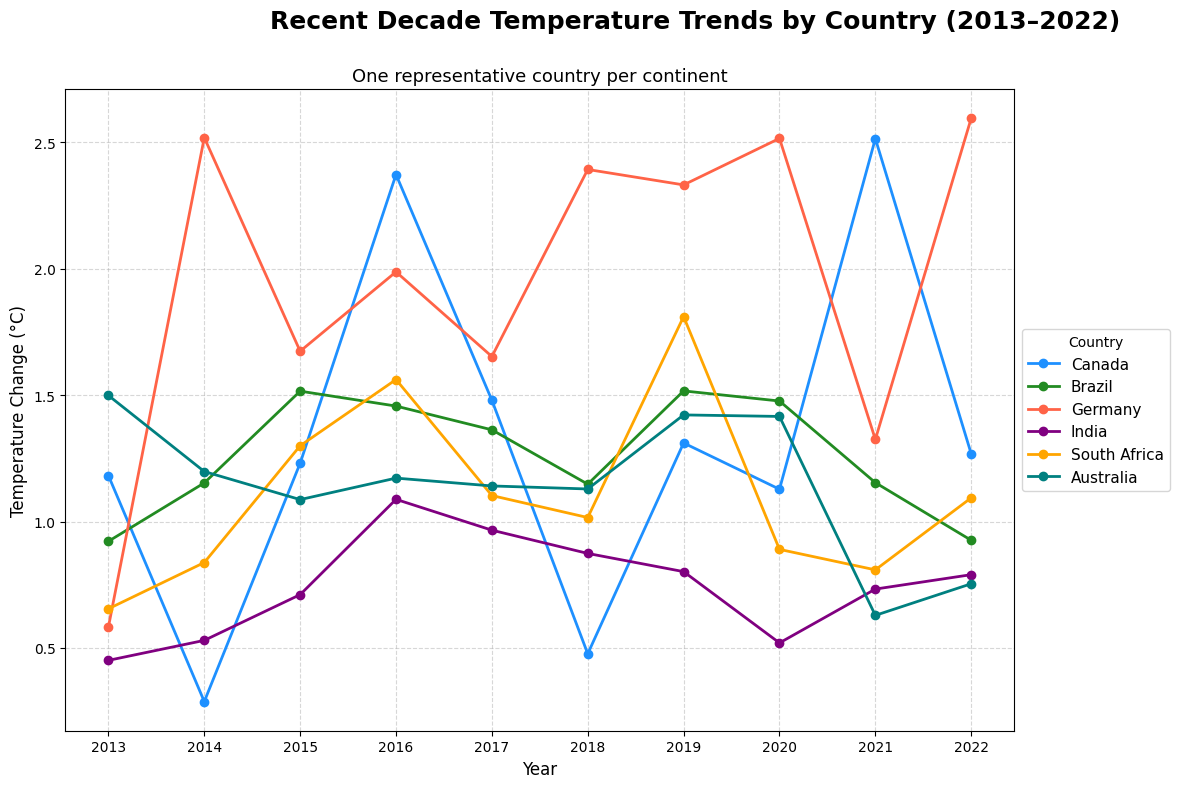

In [53]:
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported if not already

# Define year range for your project
focus_years = [year for year in range(2013, 2023)] # Keep as integers for plotting x-axis
years = focus_years # Assign the list of integer years to the 'years' variable used in plot

# Define the actual column names in the dataframe for the focus years
year_columns = [f'F{year}' for year in focus_years]

# Pick one country from each continent for comparison
countries_to_compare = {
    'Canada': 'dodgerblue',       # North America
    'Brazil': 'forestgreen',      # South America
    'Germany': 'tomato',          # Europe
    'India': 'purple',            # Asia
    'South Africa': 'orange',     # Africa
    'Australia': 'teal'           # Oceania
}

# Ensure these columns exist in the DataFrame before attempting to plot
# This is a good practice, though based on previous cells, they should exist
if not all(col in df.columns for col in year_columns):
    print("Error: Not all specified year columns found in the DataFrame. Cannot plot.")
else:
    # Filter the dataset for these countries
    comparison_data = df[df['Country'].isin(countries_to_compare.keys())]

    # Start plotting
    plt.figure(figsize=(14, 8))

    for country, color in countries_to_compare.items():
        country_data = comparison_data[comparison_data['Country'] == country]
        # Check if country_data is empty (country not found in df)
        if not country_data.empty:
            country_temps = country_data[year_columns].values.flatten()
            # Ensure the number of years matches the number of temperature points
            if len(years) == len(country_temps):
                plt.plot(
                    years,
                    country_temps,
                    marker='o',
                    linestyle='-',
                    color=color,
                    linewidth=2,
                    markersize=6,
                    label=country
                )
            else:
                print(f"Warning: Data length mismatch for {country}. Expected {len(years)} data points, found {len(country_temps)}. Skipping plot for this country.")
        else:
            print(f"Warning: Data for country '{country}' not found in the DataFrame. Skipping plot.")


    # Titles and labels
    plt.suptitle('Recent Decade Temperature Trends by Country (2013–2022)', fontsize=18, fontweight='bold')
    plt.title('One representative country per continent', fontsize=13)

    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Temperature Change (°C)', fontsize=12)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(years)
    plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)

    plt.tight_layout(rect=[0, 0, 0.85, 0.93])  # make room for titles and legend
    plt.subplots_adjust(top=0.88)

    plt.show()


In [28]:
# Calculate average temperature change per country over last 10 years
avg_temp_change = long_df.groupby('Country')['TempChange'].mean().reset_index()
avg_temp_change.rename(columns={'TempChange': 'AvgTempChange'}, inplace=True)

Label as 1 if average exceeds 1.5°C, else 0.

In [6]:

# Merge average temp change back to long_df
long_df = long_df.merge(avg_temp_change, on='Country', how='left')

# Create binary target: 1 if avg temp change > 1.5, else 0
long_df['ExceedsThreshold'] = (long_df['AvgTempChange'] > 1.5).astype(int)

Feature Scaling and Dataset Preparation

In [7]:
# Scale 'TempChange' feature
scaler = StandardScaler()
long_df['ScaledTempChange'] = scaler.fit_transform(long_df[['TempChange']])

# Features and target
X = long_df[['ScaledTempChange']]
y = long_df['ExceedsThreshold']

Split Dataset into Train, Validation, and Test Sets

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training samples: {X_train.shape[0]}, Validation samples: {X_val.shape[0]}, Test samples: {X_test.shape[0]}")


Training samples: 1575, Validation samples: 337, Test samples: 338


Balance Training Data Using SMOTE

In [9]:

# Balance the training set using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Class distribution BEFORE SMOTE:")
print(y_train.value_counts())
print("Class distribution AFTER SMOTE:")

Class distribution BEFORE SMOTE:
ExceedsThreshold
0    1127
1     448
Name: count, dtype: int64
Class distribution AFTER SMOTE:


Define Machine Learning Models

In [10]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(kernel='rbf', C=100, gamma=0.01, class_weight='balanced', probability=True, random_state=42)
}

Train, Evaluate, and Visualize Results for Each Model


========== Tuning and Training Logistic Regression ==========
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation Accuracy: 0.7893
Validation Precision: 0.6033
Validation Recall: 0.7604
Validation F1-Score: 0.6728
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.80      0.84       241
           1       0.60      0.76      0.67        96

    accuracy                           0.79       337
   macro avg       0.75      0.78      0.76       337
weighted avg       0.81      0.79      0.80       337

Test Accuracy: 0.7899
Test Precision: 0.6068
Test Recall: 0.7396
Test F1-Score: 0.6667
Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       242
           1       0.61      0.74      0.67        96

    accuracy                           0.

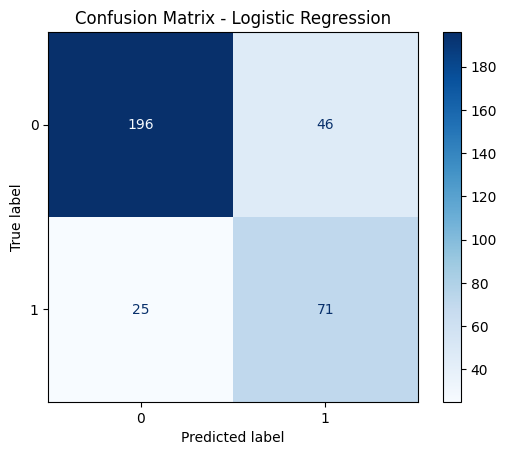


========== Tuning and Training Random Forest ==========
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best params for Random Forest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Validation Accuracy: 0.7804
Validation Precision: 0.5948
Validation Recall: 0.7188
Validation F1-Score: 0.6509
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       241
           1       0.59      0.72      0.65        96

    accuracy                           0.78       337
   macro avg       0.74      0.76      0.75       337
weighted avg       0.80      0.78      0.79       337

Test Accuracy: 0.7574
Test Precision: 0.5614
Test Recall: 0.6667
Test F1-Score: 0.6095
Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82       242
           1       0.56      0.67      0.61        96

    accuracy                       

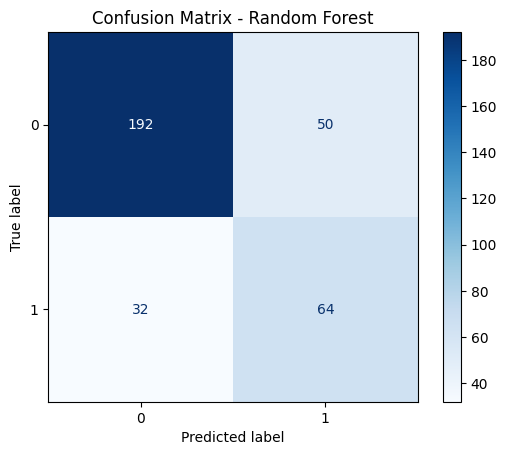


========== Tuning and Training XGBoost ==========
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Validation Accuracy: 0.7893
Validation Precision: 0.6016
Validation Recall: 0.7708
Validation F1-Score: 0.6758
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.84       241
           1       0.60      0.77      0.68        96

    accuracy                           0.79       337
   macro avg       0.75      0.78      0.76       337
weighted avg       0.81      0.79      0.80       337

Test Accuracy: 0.7781
Test Precision: 0.5929
Test Recall: 0.6979
Test F1-Score: 0.6411
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       242
           1       0.59      0.70      0.64        96

    accuracy                           0.78       338
   macro avg       0.73      0.75      0.74       338
weighted avg       0.79      0.78      0.78       338


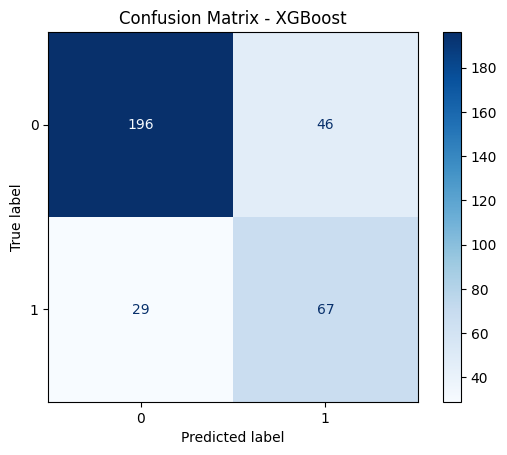


========== Tuning and Training SVM ==========
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best params for SVM: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Validation Accuracy: 0.7923
Validation Precision: 0.6121
Validation Recall: 0.7396
Validation F1-Score: 0.6698
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       241
           1       0.61      0.74      0.67        96

    accuracy                           0.79       337
   macro avg       0.75      0.78      0.76       337
weighted avg       0.81      0.79      0.80       337

Test Accuracy: 0.7929
Test Precision: 0.6140
Test Recall: 0.7292
Test F1-Score: 0.6667
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       242
           1       0.61      0.73      0.67        96

    accuracy                           0.79       338
   macro avg       0.

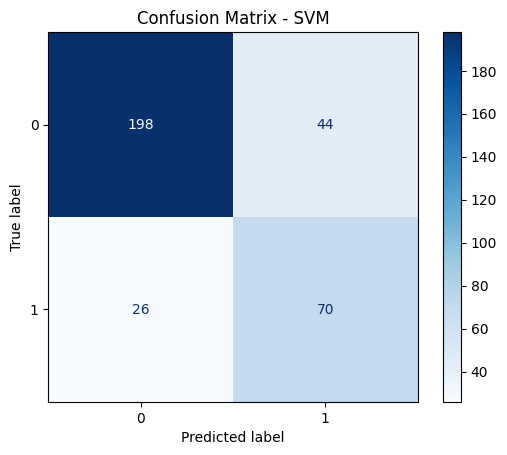

In [12]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 6],
        'learning_rate': [0.01, 0.1]
    },
    "SVM": {
        'C': [1, 10, 100],
        'gamma': [0.001, 0.01, 0.1],
        'kernel': ['rbf']
    }
}

# Initialize dictionary to store metrics
metrics_summary = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for name, model in models.items():
    print(f"\n========== Tuning and Training {name} ==========")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        scoring='f1',
        cv=StratifiedKFold(n_splits=5),
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_bal, y_train_bal)
    print(f"Best params for {name}: {grid_search.best_params_}")

    best_model = grid_search.best_estimator_

    # Validation evaluation
    y_val_pred = best_model.predict(X_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    prec_val = precision_score(y_val, y_val_pred)
    rec_val = recall_score(y_val, y_val_pred)
    f1_val = f1_score(y_val, y_val_pred)

    print(f"Validation Accuracy: {acc_val:.4f}")
    print(f"Validation Precision: {prec_val:.4f}")
    print(f"Validation Recall: {rec_val:.4f}")
    print(f"Validation F1-Score: {f1_val:.4f}")

    print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

    # Test evaluation
    y_test_pred = best_model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    prec_test = precision_score(y_test, y_test_pred)
    rec_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    print(f"Test Accuracy: {acc_test:.4f}")
    print(f"Test Precision: {prec_test:.4f}")
    print(f"Test Recall: {rec_test:.4f}")
    print(f"Test F1-Score: {f1_test:.4f}")

    print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

    metrics_summary['Model'].append(name)
    metrics_summary['Accuracy'].append(acc_test)
    metrics_summary['Precision'].append(prec_test)
    metrics_summary['Recall'].append(rec_test)
    metrics_summary['F1-Score'].append(f1_test)

    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_ if hasattr(best_model, 'classes_') else [0,1])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


Plot Model Comparison Bar Charts on Test Metrics

<ipython-input-13-2953155416>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics_df['Model'], rotation=30, ha='right')
<ipython-input-13-2953155416>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics_df['Model'], rotation=30, ha='right')
<ipython-input-13-2953155416>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics_df['Model'], rotation=30, ha='right')
<ipython-input-13-2953155416>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(metrics_df['Model'], rotation=30, ha='right')


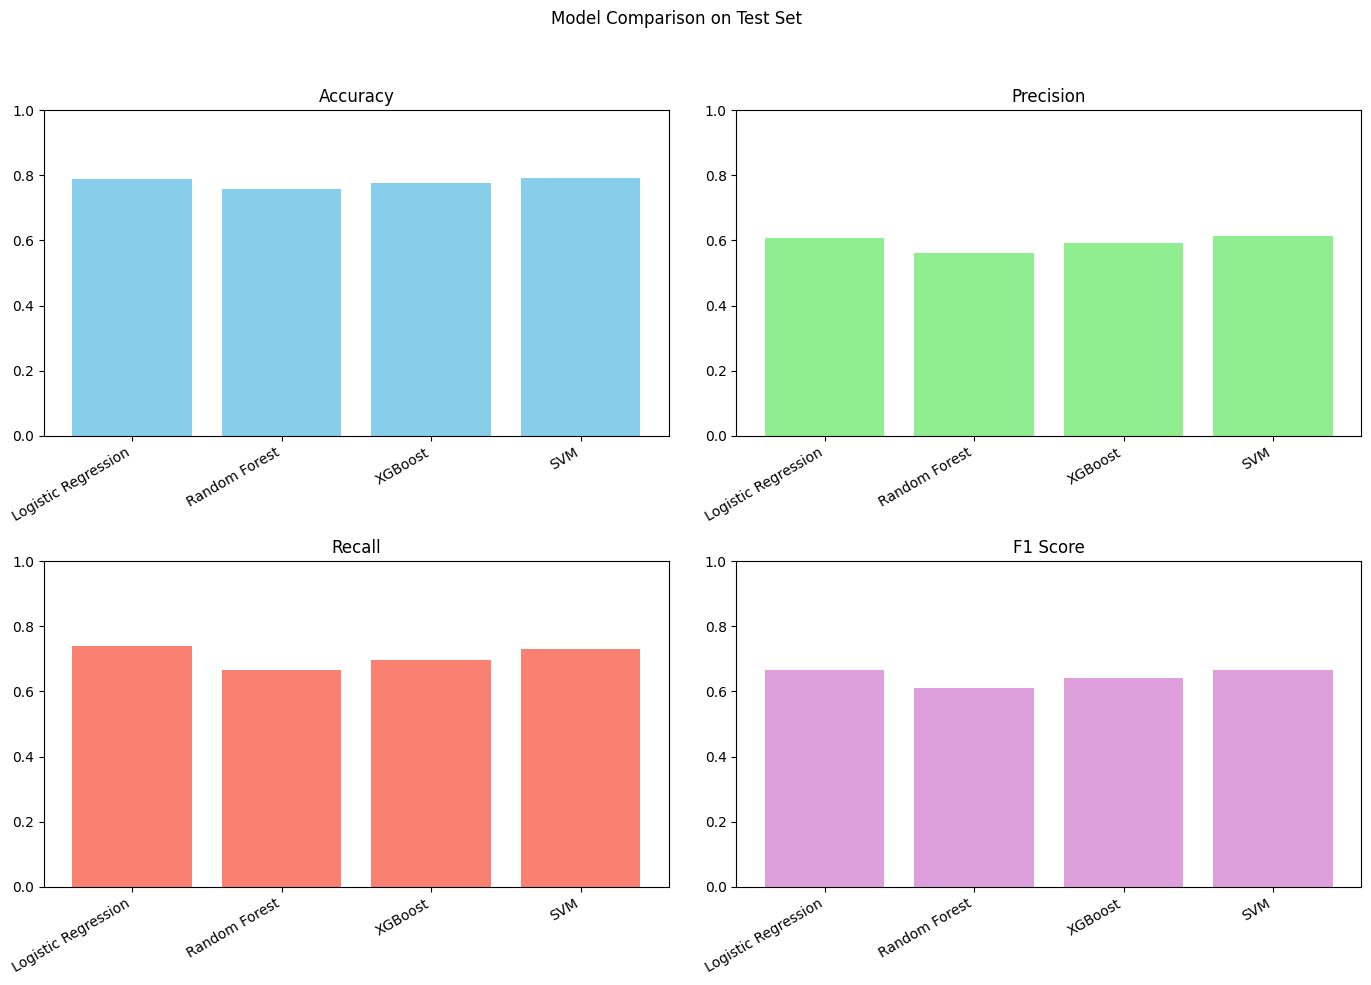

In [ ]:
# Create the DataFrame
metrics_df = pd.DataFrame(metrics_summary)

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue')
plt.title('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Plot Precision
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Model'], metrics_df['Precision'], color='lightgreen')
plt.title('Precision')
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Plot Recall
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Model'], metrics_df['Recall'], color='salmon')
plt.title('Recall')
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# Plot F1-Score
plt.figure(figsize=(8, 5))
plt.bar(metrics_df['Model'], metrics_df['F1-Score'], color='plum')
plt.title('F1 Score')
plt.ylim(0, 1)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()